<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/ML_Practice9_PRJ_ABNB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

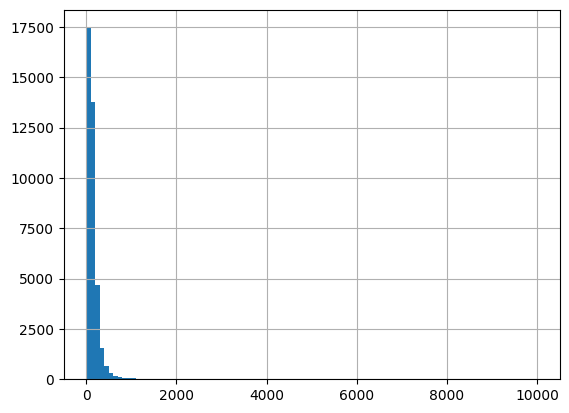

In [5]:
# 라이브러리
import pandas as pd
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# 데이터 크기
train.shape, test.shape
# 데이터 샘플
display(train.head(2))
display(test.head(2))
# 결측치(train)
train.isnull().sum()
# 결측치(test)
test.isnull().sum()
# target(hist)
train['price'].hist(bins=100)
# target(describe)
train['price'].describe()
# 피처(host_id)
train['host_id'].value_counts()

In [6]:
# 결측치 컬럼 삭제(last_review)
train=train.drop(columns=['last_review'])
test=test.drop(columns=['last_review'])

# 결측치 채우기
train['name'] = train['name'].fillna('unknown')
train['host_name'] = train['host_name'].fillna('unknown')
train['reviews_per_month'] = train['reviews_per_month'].fillna(train['reviews_per_month'].min())

test['name'] = test['name'].fillna('unknown')
test['host_name'] = test['host_name'].fillna('unknown')
test['reviews_per_month'] = test['reviews_per_month'].fillna(test['reviews_per_month'].min())

# 결측치 확인
test.isnull().sum()

# 가격 값 복사
price = train['price']
price

# 수치형 피처 선택
# [[YOUR CODE]]

# 검증 데이터 분리
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def make_dataset():
    dataset = train
    df = pd.DataFrame(train, columns=train.columns)
    df['price'] = dataset.price
    X_train, X_test, y_train, y_t = train_test_split(
        df.drop('price', axis=1), df['price'], test_size=0.2, random_state=2022)
    return X_train, X_test, y_train, y_t

X_train, X_test, y_train, y_t = make_dataset()

#범주형 데이터 삭제
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train = X_train.drop(columns=categorical_columns)
X_test = X_test.drop(columns=categorical_columns)


test = test.drop(columns=categorical_columns)

In [7]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
#모델선택
model = LinearRegression()
#학습
model.fit(X_train, y_train)
#예측
pred=model.predict(X_test)

# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge() #alpha = 1 이 기본값
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_t,pred)

# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso() #alpha = 1 이 기본값
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_t,pred)
coef2 = pd.DataFrame(data=model.coef_,index = X_train.columns,columns=['alpha1'])
coef2

# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet() #alpha = 1 이 기본값
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_t,pred)
coef3 = pd.DataFrame(data=model.coef_,index = X_train.columns,columns=['a1/l10.5'])
coef3

# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_t,pred)

# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_t,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83227e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


31378.592005582548

In [12]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)
from sklearn.model_selection import GridSearchCV

#하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid.best_params_)

# 최적의 모델로 예측
best_model = grid.best_estimator_
pred = best_model.predict(test)

# MSE 계산
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 51021.3156559762


In [13]:

# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print("나의 점수는 (LMS에선 MSE 48966.43361271485가 나오는데, 코랩에선 그 숫자가 안나옵니다 LMS 내용은 캡처 해두었습니다.  ")

나의 점수는 (LMS에선 MSE 48966.43361271485가 나오는데, 코랩에선 그 숫자가 안나옵니다 LMS 내용은 캡처 해두었습니다.  
